# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        
# Print the city count to confirm sufficient count
len(cities)
#len(countries)

505

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=" + weather_api_key +"&q="
citiesdf = pd.DataFrame({"City":cities})

In [37]:
print("Beginning Data Retrieval")
print("-----------------------------------------------------------")


# for-loop
for index, row in citiesdf.iterrows():
    city =row["City"]
    response = requests.get(url+city)
    city_weather = response.json()
    print(f"Processing Record {index} | {city}")
    city_weather_url =response.url
    print(response.url)

    
    try:
        citiesdf.loc[index,"Latitude"]=city_weather['coord']['lat']
        citiesdf.loc[index,"Longitude"]=city_weather["coord"]['lon'] 
        citiesdf.loc[index,"Max Temperature"]=city_weather['main']['temp']
        citiesdf.loc[index,"Humidity"]=city_weather['main']['humidity']
        citiesdf.loc[index,"Cloudiness"]=city_weather['clouds']['all']
        citiesdf.loc[index,"Wind Speed"]=city_weather['wind']['speed']
        citiesdf.loc[index, "Country"]=city_weather['sys']['country']
        citiesdf.loc[index, "Date"]=city_weather['dt']
      
        
    except (KeyError, IndexError):
        print(f"City not found... skipping.")
        
print(citiesdf)
print("-----------------------------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------------------------")

Beginning Data Retrieval
-----------------------------------------------------------
Processing Record 0 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=mataura
Processing Record 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=ushuaia
Processing Record 2 | wanning
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=wanning
Processing Record 3 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=palabuhanratu
City not found... skipping.
Processing Record 4 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=atuona
Processing Record 5 | san policarpo
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=san%20policarpo
Processing Record 6 | t

Processing Record 56 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=jamestown
Processing Record 57 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=sorland
Processing Record 58 | ranong
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=ranong
Processing Record 59 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=port%20elizabeth
Processing Record 60 | inuvik
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=inuvik
Processing Record 61 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=busselton
Processing Record 62 | touros
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=to

Processing Record 112 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=yar-sale
Processing Record 113 | hirara
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=hirara
Processing Record 114 | angra dos reis
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=angra%20dos%20reis
Processing Record 115 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=ilulissat
Processing Record 116 | cortez
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=cortez
Processing Record 117 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=taolanaro
City not found... skipping.
Processing Record 118 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Metrics&A

Processing Record 167 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=victoria
Processing Record 168 | turayf
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=turayf
Processing Record 169 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=isangel
Processing Record 170 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=kavieng
Processing Record 171 | wakkanai
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=wakkanai
Processing Record 172 | gibsons
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=gibsons
Processing Record 173 | lata
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=lata
Processing

Processing Record 224 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=bluff
Processing Record 225 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=caravelas
Processing Record 226 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=praia%20da%20vitoria
Processing Record 227 | sterling
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=sterling
Processing Record 228 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=kieta
Processing Record 229 | san jose
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=san%20jose
Processing Record 230 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3

Processing Record 280 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=kununurra
Processing Record 281 | umm lajj
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=umm%20lajj
Processing Record 282 | colimes
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=colimes
Processing Record 283 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=chuy
Processing Record 284 | jishou
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=jishou
Processing Record 285 | chihuahua
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=chihuahua
Processing Record 286 | kuche
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=kuche
City n

Processing Record 335 | fort saint james
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=fort%20saint%20james
Processing Record 336 | benton harbor
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=benton%20harbor
Processing Record 337 | sibolga
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=sibolga
Processing Record 338 | kant
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=kant
Processing Record 339 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=norman%20wells
Processing Record 340 | jaipur hat
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=jaipur%20hat
City not found... skipping.
Processing Record 341 | barcelos
http://api.openweathermap.org/data/2.

Processing Record 391 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=salalah
Processing Record 392 | jiuquan
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=jiuquan
Processing Record 393 | dingle
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=dingle
Processing Record 394 | birin
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=birin
Processing Record 395 | shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=shenjiamen
Processing Record 396 | esmeraldas
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=esmeraldas
Processing Record 397 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=klaksvi

Processing Record 448 | kathu
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=kathu
Processing Record 449 | tarakan
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=tarakan
Processing Record 450 | sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=sobolevo
Processing Record 451 | spolaita
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=spolaita
Processing Record 452 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=hasaki
Processing Record 453 | port moresby
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=port%20moresby
Processing Record 454 | xichang
http://api.openweathermap.org/data/2.5/weather?units=Metrics&APPID=b19b44ad5389d3a5112c8daa0b3b0036&q=xich

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
citiesdf.to_csv('citiesdf.csv')
citiesdf.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,285.93,83.0,93.0,0.89,NZ,1.616172e+09
1,ushuaia,-54.8000,-68.3000,284.15,62.0,40.0,5.66,AR,1.616172e+09
2,wanning,18.8003,110.3967,296.26,95.0,15.0,2.66,CN,1.616172e+09
3,palabuhanratu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,atuona,-9.8000,-139.0333,299.87,77.0,48.0,6.03,PF,1.616172e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
check_data = citiesdf['Humidity'].max()
check_data

100.0

In [40]:
print("There are no cities that have humidity greater than 100%")

There are no cities that have humidity greater than 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

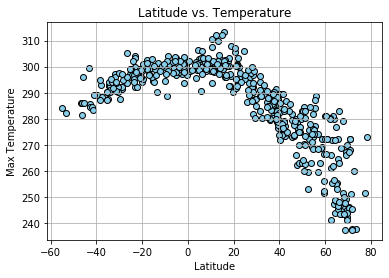

When latitude is negative (southern hemisphere), temperatures are consistently high. On the other hand, in the northern hemisphere where latitude is positive, temperatures begin to decrease as latitude goes north.


<Figure size 432x288 with 0 Axes>

In [59]:
plt.scatter(citiesdf['Latitude'], citiesdf['Max Temperature'], color='skyblue', edgecolor='black')
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()
plt.show()

print('When latitude is negative (southern hemisphere), temperatures are consistently high. On the other hand, in the northern hemisphere where latitude is positive, temperatures begin to decrease as latitude goes north.')

plt.savefig('latitude_vs_temperature')

## Latitude vs. Humidity Plot

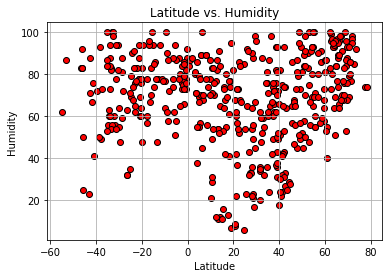

Latitudes that are not close to the equator (0) have a least more than 60% humidity. However, those cities that are near/north of the equator have humidities lower than 60%.


<Figure size 432x288 with 0 Axes>

In [57]:
plt.scatter(citiesdf['Latitude'], citiesdf['Humidity'], color='red', edgecolor='black')
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()

print("Latitudes that are not close to the equator (0) have a least more than 60% humidity. However, those cities that are near/north of the equator have humidities lower than 60%.")

plt.savefig('latitude_vs_humidity')


## Latitude vs. Cloudiness Plot

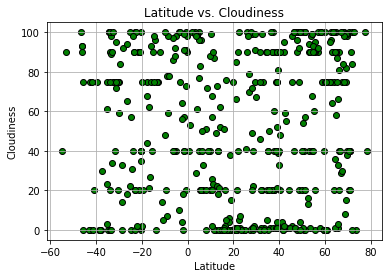

Cloudiness occurs in all latitudes. There is a trend in the northern hemisphere where abundant cities do not have any cloudiness in their area.


<Figure size 432x288 with 0 Axes>

In [58]:
plt.scatter(citiesdf['Latitude'], citiesdf['Cloudiness'], color='green', edgecolor='black')
plt.grid()
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print("Cloudiness occurs in all latitudes. There is a trend in the northern hemisphere where abundant cities do not have any cloudiness in their area.")

plt.savefig('latitude_vs_cloudiness')


## Latitude vs. Wind Speed Plot

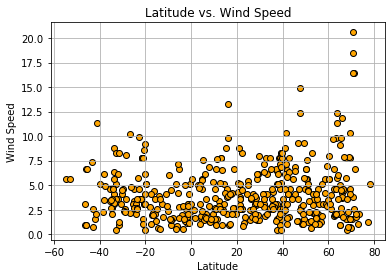

Wind speeds are usually under 7.5 MPH in all latitudes. However, in the highest part of the northern hemisphere, wind speeds have reach up to 20 MPH.


<Figure size 432x288 with 0 Axes>

In [97]:
plt.scatter(citiesdf['Latitude'], citiesdf['Wind Speed'], color='orange', edgecolor='black')
plt.grid()
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print("Wind speeds are usually under 7.5 MPH in all latitudes. However, in the highest part of the northern hemisphere, wind speeds have reach up to 20 MPH.")

plt.savefig('latitude_vs_windspeed')

## Linear Regression

In [65]:
south_hemi = citiesdf.loc[citiesdf['Latitude'] < 0]
north_hemi = citiesdf.loc[citiesdf['Latitude'] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

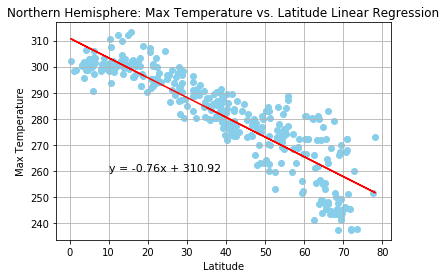

The r-squared is: 0.780148739200379


In [77]:
plt.scatter(north_hemi['Latitude'], north_hemi['Max Temperature'], color='skyblue')
plt.title('Northern Hemisphere: Max Temperature vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()

x_values = north_hemi['Latitude']
y_values = north_hemi['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,260),fontsize=11,color="black")

plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

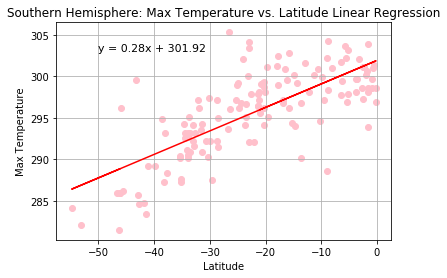

The r-squared is: 0.5430494785288142


In [78]:
plt.scatter(south_hemi['Latitude'], south_hemi['Max Temperature'], color ='pink')
plt.title('Southern Hemisphere: Max Temperature vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()

x_values = south_hemi['Latitude']
y_values = south_hemi['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,303),fontsize=11,color="black")

plt.show()
print(f"The r-squared is: {rvalue**2}")

# Conclusion North Vs. South Temperatures:
In the northern hemisphere, there is a negative correlation in temperature. The farther out the cities are from the equator, the likely  temperatures drop. It is more cold in the northern hemisphere than in the south. Cities that are near the equator have high temperatures.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

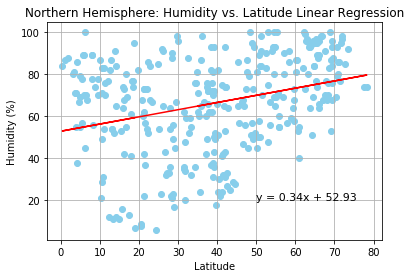

The r-squared is: 0.09374162670582104


In [86]:
plt.scatter(north_hemi['Latitude'], north_hemi['Humidity'], color='skyblue')
plt.grid()
plt.title('Northern Hemisphere: Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

x_values = north_hemi['Latitude']
y_values = north_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=11,color="black")

plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

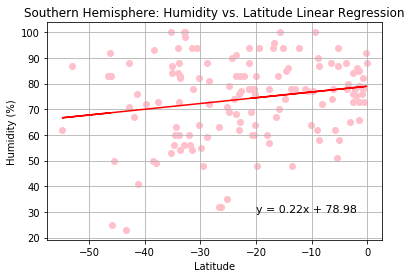

The r-squared is: 0.03618736857360796


In [88]:
plt.scatter(south_hemi['Latitude'], south_hemi['Humidity'], color='pink')
plt.grid()
plt.title('Southern Hemisphere: Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

x_values = south_hemi['Latitude']
y_values = south_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=11,color="black")

plt.show()
print(f"The r-squared is: {rvalue**2}")

# Conclusion North Vs. South Humidity:
The northern hemisphere's humidity is a little lower than the south. The south has high humidities than the north however, as it moves south from the equator humidity is slightly decreases. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

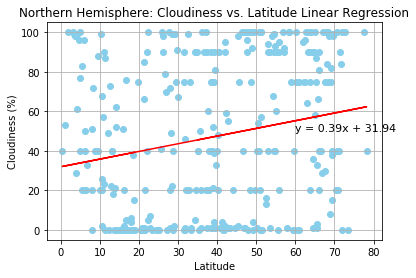

The r-squared is: 0.04295452557071979


In [90]:
plt.scatter(north_hemi['Latitude'], north_hemi['Cloudiness'], color='skyblue')
plt.grid()
plt.title('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

x_values = north_hemi['Latitude']
y_values = north_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,50),fontsize=11,color="black")

plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

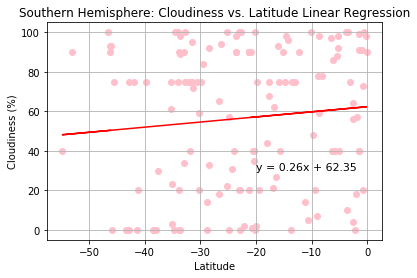

The r-squared is: 0.00956492810071603


In [91]:
plt.scatter(south_hemi['Latitude'], south_hemi['Cloudiness'], color='pink')
plt.grid()
plt.title('Southern Hemisphere: Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

x_values = south_hemi['Latitude']
y_values = south_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=11,color="black")

plt.show()
print(f"The r-squared is: {rvalue**2}")

# Conclusion: North Vs. South Cloudiness:
There are much more clouds in cities that are closer to the equator and in the northern hemisphere rather than the south.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

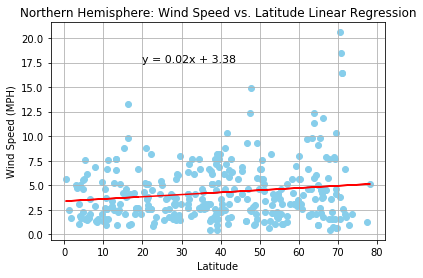

The r-squared is: 0.0236063334666594


In [94]:
plt.scatter(north_hemi['Latitude'], north_hemi['Wind Speed'], color='skyblue')
plt.grid()
plt.title('Northern Hemisphere: Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

x_values = north_hemi['Latitude']
y_values = north_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,17.5),fontsize=11,color="black")

plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

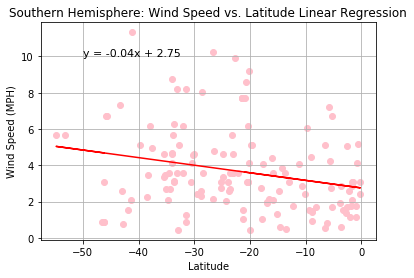

The r-squared is: 0.061227504223853105


In [96]:
plt.scatter(south_hemi['Latitude'], south_hemi['Wind Speed'], color='pink')
plt.grid()
plt.title('Southern Hemisphere: Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

x_values = south_hemi['Latitude']
y_values = south_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=11,color="black")

plt.show()
print(f"The r-squared is: {rvalue**2}")

# Conclusion North Vs. South Wind Speed
The northern hemisphere has experienced more winds than the south. Winds in the upper north of the hemisphere has experienced very high wind speeds reaching 20 MPH. The south has a negative correlation showing that cities that are closer to the equator experience low wind speeds.